### Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

* 1 min

In [2]:
dt_signal_1 = np.load('workspace/data/k_ppg_signal_1.npy') # 1 min ppg

In [3]:
lb_list = np.load('workspace/data/k_ppg_lb.npy')

In [4]:
data = list(dt_signal_1)

In [5]:
df = pd.DataFrame(data)

In [6]:
label = list(lb_list)

In [7]:
df['label'] = label

In [8]:
df 
# label : -1 down, 0 norm , 1 up 
# 0 norm
# -1, 1, abnorm

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,label
0,25.309900,23.729900,22.940001,22.545000,22.545000,22.545000,24.124901,26.099800,29.259701,33.209499,...,50.193802,52.563702,55.328602,57.303501,58.488400,58.488400,58.488400,57.698502,56.513500,-1.0
1,59.278400,59.278400,59.673401,59.278400,58.488400,56.513500,54.538601,52.168701,49.008801,46.243999,...,43.084099,40.714199,39.134300,37.554298,35.974400,34.394501,33.209499,32.024601,30.444599,-1.0
2,49.008801,46.243999,43.479099,40.714199,39.134300,37.159401,35.579399,33.999500,32.814499,31.234600,...,28.864700,26.889799,26.099800,24.914900,24.124901,22.940001,22.150000,21.360001,20.965099,-1.0
3,33.209499,30.839600,30.444599,29.259701,28.074800,26.889799,26.494801,24.914900,24.124901,24.124901,...,23.334999,23.334999,22.940001,23.729900,24.914900,28.074800,31.234600,35.184399,39.529301,-1.0
4,28.074800,28.469700,28.469700,29.654699,30.444599,32.814499,35.974400,39.529301,43.874100,49.008801,...,31.234600,32.419601,35.184399,39.529301,44.269001,48.613899,53.353699,57.303501,60.068401,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583,11.090500,9.115580,7.930630,11.485500,9.905540,7.930630,11.485500,9.510560,7.930630,10.695500,...,9.510560,7.140660,4.375780,9.115580,6.745680,4.375780,8.325610,8.720590,7.535650,0.0
584,9.510560,7.140660,9.905540,9.510560,7.930630,10.300500,9.510560,7.535650,10.300500,9.510560,...,8.720590,6.350700,8.720590,8.720590,12.275400,6.745680,9.510560,6.350700,9.510560,0.0
585,6.745680,8.720590,5.165750,6.745680,8.720590,5.165750,9.510560,8.720590,5.955710,7.535650,...,8.720590,8.720590,8.720590,7.140660,8.325610,7.535650,6.745680,6.350700,8.325610,0.0
586,47.033901,57.698502,68.362999,79.027496,85.742203,89.692101,88.507103,84.162300,73.497803,62.438301,...,30.444599,34.789501,38.739300,42.689098,46.638901,48.613899,50.193802,50.588799,49.798801,-1.0


In [9]:
df['label'].value_counts()

 0.0    513
-1.0     70
 1.0      5
Name: label, dtype: int64

* bandpass filter

In [10]:
from scipy.signal import butter
from scipy.signal import lfilter

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs # 50, fs:100 
    low = lowcut / nyq # 0.5/50 = 1/100, lowcut: 0.5
    high = highcut / nyq # 15/50 = 30/100, highcut : 15
    # order : frequency cut wave
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y


# BPF setting 0.5 ~ 15 hz
lowcut = 0.5
highcut = 15

* ex

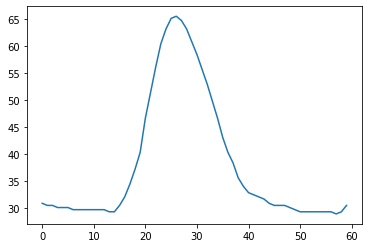

In [11]:
plt.plot(df[df['label'] == 0].iloc[0][:-1])

In [12]:
yy = butter_bandpass_filter(df[df['label'] == 0].iloc[0][:-1], lowcut, highcut, 100, order=5)

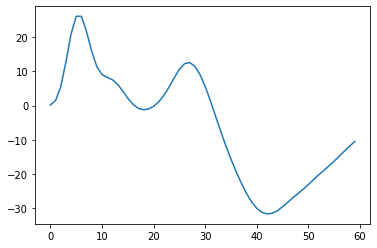

In [13]:
plt.plot(yy)

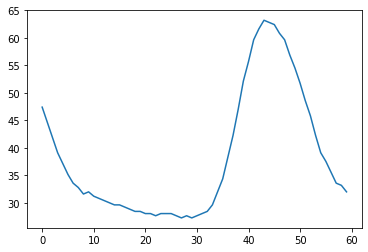

In [14]:
plt.plot(df[df['label'] == 0].iloc[1][:-1])

In [15]:
yy = butter_bandpass_filter(df[df['label'] == 0].iloc[1][:-1], lowcut, highcut, 100, order=5)

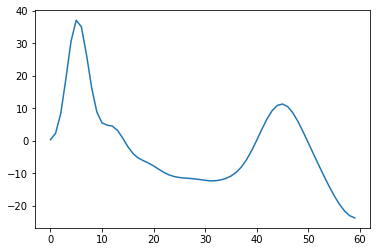

In [16]:
plt.plot(yy)

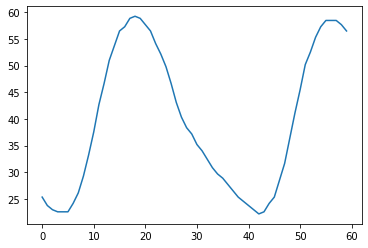

In [17]:
plt.plot(df[df['label'] == -1].iloc[0][:-1])

In [18]:
yy = butter_bandpass_filter(df[df['label'] == -1].iloc[0][:-1], lowcut, highcut, 100, order=5)

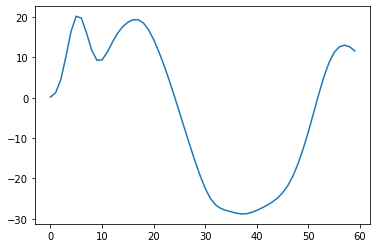

In [19]:
plt.plot(yy)

* filtering

In [20]:
dt_signal_1_bp = []
for i in dt_signal_1:
    yy = butter_bandpass_filter(i, lowcut, highcut, 100, order=5)
    dt_signal_1_bp.append(yy)

In [21]:
dt_signal_1

array([[25.30990028, 23.72990036, 22.94000053, ..., 58.48839951,
        57.69850159, 56.51350021],
       [59.27840042, 59.27840042, 59.67340088, ..., 33.20949936,
        32.02460098, 30.44459915],
       [49.00880051, 46.24399948, 43.47909927, ..., 22.14999962,
        21.36000061, 20.96509933],
       ...,
       [ 6.74567986,  8.72058964,  5.16575003, ...,  6.74567986,
         6.3506999 ,  8.32561016],
       [47.03390121, 57.69850159, 68.36299896, ..., 50.19380188,
        50.58879852, 49.79880142],
       [-3.12889004, -3.52386999, -3.12889004, ..., -3.12889004,
        -3.12889004, -3.12889004]])

In [22]:
dt_signal_1_bp

[array([  0.15285625,   1.20765889,   4.43721416,  10.16826881,
         16.46232883,  20.21675022,  19.75411168,  16.07307647,
         11.8224495 ,   9.33178175,   9.36885387,  11.24313712,
         13.73652009,  15.95820332,  17.60495253,  18.71987425,
         19.34491644,  19.36190319,  18.57604354,  16.90547616,
         14.46692045,  11.47749369,   8.10927493,   4.44567984,
          0.53609658,  -3.53485128,  -7.64046129, -11.67433791,
        -15.576783  , -19.24853055, -22.46204406, -24.93786688,
        -26.54955067, -27.43798083, -27.91828131, -28.27412945,
        -28.60150107, -28.8095342 , -28.76645679, -28.44547672,
        -27.93346921, -27.32667276, -26.64871547, -25.85892439,
        -24.88331685, -23.60006851, -21.83692782, -19.44296398,
        -16.36570438, -12.65386874,  -8.42132557,  -3.84640376,
          0.79460309,   5.12001406,   8.7087505 ,  11.24392415,
         12.6424997 ,  13.03817338,  12.64040221,  11.62333743]),
 array([  0.35800512,   2.85081073,  1

### Autoencoder

In [127]:
import matplotlib.pyplot as plt


import numpy as np
import pandas as pd

import sklearn
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score

from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model

In [24]:
data = list(dt_signal_1_bp)

In [25]:
label = list(lb_list)

In [26]:
df = pd.DataFrame(data)

In [27]:
df['label'] = label

In [28]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,label
0,0.152856,1.207659,4.437214,10.168269,16.462329,20.216750,19.754112,16.073076,11.822449,9.331782,...,-3.846404,0.794603,5.120014,8.708750,11.243924,12.642500,13.038173,12.640402,11.623337,-1.0
1,0.358005,2.850811,10.583938,24.586871,40.511776,50.851045,50.919881,42.123350,29.981086,19.715131,...,-3.702966,-6.657846,-9.609403,-12.323273,-14.533106,-16.039387,-16.836024,-17.117189,-17.138877,-1.0
2,0.295983,2.340228,8.598704,19.670420,31.672685,38.390829,36.426069,27.689619,17.297760,9.615265,...,-24.358280,-24.258697,-23.900612,-23.380444,-22.809447,-22.220908,-21.560694,-20.761766,-19.803739,-1.0
3,0.200565,1.582795,5.811737,13.315787,21.552751,26.406860,25.543467,20.082291,13.308122,8.113716,...,-23.883419,-22.860993,-21.829658,-20.633078,-19.125142,-17.234369,-14.905740,-12.036658,-8.528704,-1.0
4,0.169555,1.352555,5.030513,11.714352,19.390056,24.596422,25.287083,22.364131,18.655439,16.702099,...,-9.911089,-8.657646,-7.172496,-5.319587,-2.986753,-0.059081,3.512324,7.569635,11.710151,-1.0


In [29]:
df['label'] = df['label'].map(lambda x : True if x == 0 else False)

* Remove NaN

In [30]:
df_drop = df.dropna()

In [31]:
raw_data_norm = df_drop.values

* Norm : for train

In [32]:
labels = raw_data_norm[:, -1]
data = raw_data_norm[:, 0:-1]

* train tune split

In [33]:
train_data, valid_data, train_labels, valid_labels = train_test_split(
    data, labels, test_size=0.3, random_state=21
)

In [34]:
print(train_data.shape, train_labels.shape, valid_data.shape, valid_labels.shape)

(406, 60) (406,) (174, 60) (174,)


In [35]:
valid_data, test_data, valid_labels, test_labels = train_test_split(
    valid_data, valid_labels, test_size=0.5, random_state=21
)

In [36]:
print(train_data.shape, train_labels.shape, valid_data.shape, valid_labels.shape, test_data.shape, test_labels.shape)

(406, 60) (406,) (87, 60) (87,) (87, 60) (87,)


In [85]:
# minmaxnormalization
min_tr = tf.reduce_min(np.float32(train_data))
# max
max_tr = tf.reduce_max(np.float32(train_data))
# min
min_val = tf.reduce_min(np.float32(valid_data))
# min
max_val = tf.reduce_max(np.float32(valid_data))

min_te = tf.reduce_min(np.float32(test_data))
# min
max_te = tf.reduce_max(np.float32(test_data))

In [86]:
train_data = (train_data - min_tr) / (max_tr - min_tr)
valid_data = (train_data - min_val) / (max_val - min_val)
test_data = (test_data - min_te) / (max_te - min_te)

train_data = tf.cast(train_data, tf.float32)
valid_data = tf.cast(test_data, tf.float32)
test_data = tf.cast(test_data, tf.float32)

* train only norm

In [87]:
train_only_data = []
train_only_label = []
for dt, lb in zip(train_data, train_labels):
    if lb == True:
        train_only_data.append(dt)
        train_only_label.append(lb)

In [88]:
train_only_data = tf.cast(train_only_data, tf.float32)

In [89]:
valid_only_data = []
valid_only_label = []
for dt, lb in zip(valid_data, valid_labels):
    if lb == True:
        valid_only_data.append(dt)
        valid_only_label.append(lb)

In [90]:
valid_only_data = tf.cast(valid_only_data, tf.float32)

In [91]:
class AnomalyDetector(Model):
  def __init__(self):
    super(AnomalyDetector, self).__init__()

    self.encoder = tf.keras.Sequential([
      layers.Dense(60, activation="relu"),
      layers.Dense(32, activation="relu"),
      layers.Dense(16, activation="relu"),
      layers.Dense(8, activation="relu"),
      layers.Dense(4, activation="relu")])

    self.decoder = tf.keras.Sequential([
      layers.Dense(8, activation="relu"),
      layers.Dense(16, activation="relu"),
      layers.Dense(32, activation="relu"),
      layers.Dense(60, activation="sigmoid")])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = AnomalyDetector()


In [92]:
autoencoder.compile(optimizer='adam', loss='mae')

In [93]:
history = autoencoder.fit(train_only_data, train_only_data, 
          epochs=500, 
          batch_size=64,
          validation_data=(valid_data, valid_data),
          shuffle=True)

Epoch 1/500
6/6 [==============================] - 0s 12ms/step - loss: 0.0996 - val_loss: 0.1253
Epoch 2/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0965 - val_loss: 0.1210
Epoch 3/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0916 - val_loss: 0.1142
Epoch 4/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0844 - val_loss: 0.1042
Epoch 5/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0764 - val_loss: 0.0933
Epoch 6/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0695 - val_loss: 0.0866
Epoch 7/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0634 - val_loss: 0.0798
Epoch 8/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0580 - val_loss: 0.0725
Epoch 9/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0537 - val_loss: 0.0711
Epoch 10/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0510 - val_loss: 0.0661
Epoch 11/500
6/6 [==========

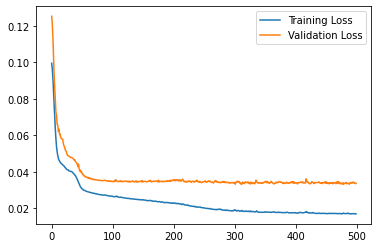

In [94]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()

* valid

In [95]:
valid_only_data = []
valid_only_label = []
for dt, lb in zip(valid_data, valid_labels):
    if lb == True:
        valid_only_data.append(dt)
        valid_only_label.append(lb)

In [96]:
valid_only_data = tf.cast(valid_only_data, tf.float32)

In [97]:
valid_ab_data = []
valid_ab_label = []
for dt, lb in zip(valid_data, valid_labels):
    if lb == False:
        valid_ab_data.append(dt)
        valid_ab_label.append(lb)

In [98]:
valid_ab_data = tf.cast(valid_ab_data, tf.float32)

* valid : Norm

In [99]:
encoded_imgs = autoencoder.encoder(valid_only_data).numpy()
# noral_test_data : latent vector
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

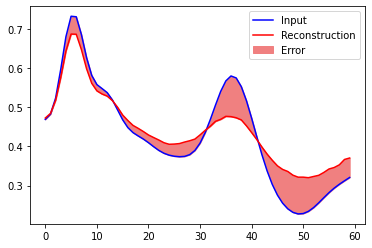

In [100]:
plt.plot(valid_only_data[0], 'b')
# 정상 데이터 : 원본 
plt.plot(decoded_imgs[0], 'r')
# decoded_imgs : 복원 
plt.fill_between(np.arange(60), decoded_imgs[0], valid_only_data[0], color='lightcoral')
# 차이를 채워주는 함수
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

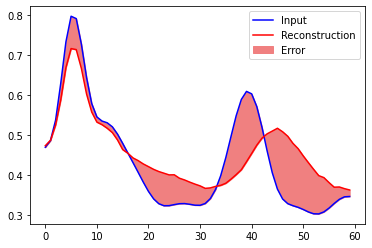

In [101]:
plt.plot(valid_only_data[1], 'b')
# 정상 데이터 : 원본 
plt.plot(decoded_imgs[1], 'r')
# decoded_imgs : 복원 
plt.fill_between(np.arange(60), decoded_imgs[1], valid_only_data[1], color='lightcoral')
# 차이를 채워주는 함수
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

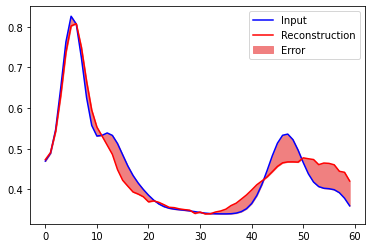

In [102]:
plt.plot(valid_only_data[2], 'b')
# 정상 데이터 : 원본 
plt.plot(decoded_imgs[2], 'r')
# decoded_imgs : 복원 
plt.fill_between(np.arange(60), decoded_imgs[2], valid_only_data[2], color='lightcoral')
# 차이를 채워주는 함수
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

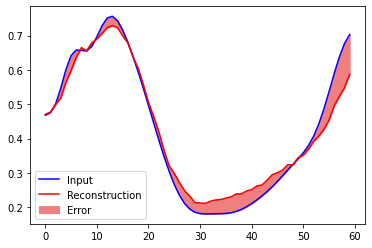

In [103]:
plt.plot(valid_only_data[33], 'b')
# 정상 데이터 : 원본 
plt.plot(decoded_imgs[33], 'r')
# decoded_imgs : 복원 
plt.fill_between(np.arange(60), decoded_imgs[33], valid_only_data[33], color='lightcoral')
# 차이를 채워주는 함수
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

* valid : abnormal

In [104]:
encoded_imgs = autoencoder.encoder(valid_ab_data).numpy()
# noral_test_data를 encoder에 입력 : latent vector
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

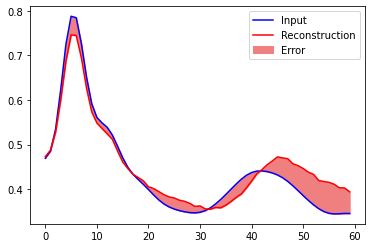

In [105]:
plt.plot(valid_ab_data[1], 'b')
# 정상 데이터 : 원본 
plt.plot(decoded_imgs[1], 'r')
# decoded_imgs : 복원 
plt.fill_between(np.arange(60), decoded_imgs[1], valid_ab_data[1], color='lightcoral')
# 차이를 채워주는 함수
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

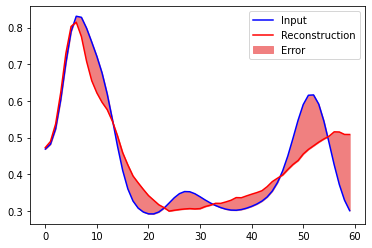

In [106]:
plt.plot(valid_ab_data[3], 'b')
# 정상 데이터 : 원본 
plt.plot(decoded_imgs[3], 'r')
# decoded_imgs : 복원 
plt.fill_between(np.arange(60), decoded_imgs[3], valid_ab_data[3], color='lightcoral')
# 차이를 채워주는 함수
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

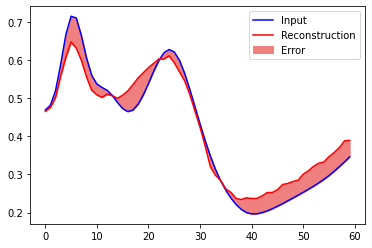

In [108]:
plt.plot(valid_ab_data[4], 'b')
# 정상 데이터 : 원본 
plt.plot(decoded_imgs[4], 'r')
# decoded_imgs : 복원 
plt.fill_between(np.arange(60), decoded_imgs[4], valid_ab_data[4], color='lightcoral')
# 차이를 채워주는 함수
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

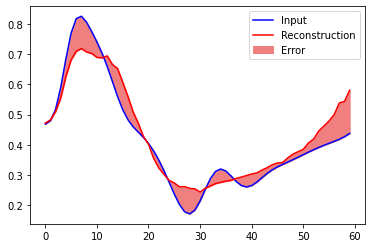

In [110]:
plt.plot(valid_ab_data[8], 'b')
# 정상 데이터 : 원본 
plt.plot(decoded_imgs[8], 'r')
# decoded_imgs : 복원 
plt.fill_between(np.arange(60), decoded_imgs[8], valid_ab_data[8], color='lightcoral')
# 차이를 채워주는 함수
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

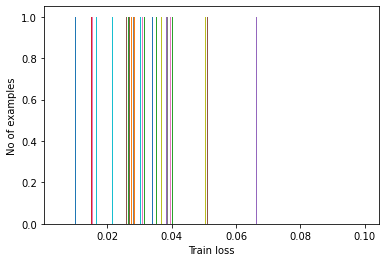

In [111]:
reconstructions = autoencoder.predict(valid_only_data)
test_loss = tf.keras.losses.mae(reconstructions, valid_only_data)
# 정상데이터와 복원한 데이터의 mae

plt.hist(test_loss)
plt.xlabel("Train loss")
plt.ylabel("No of examples")
plt.show()

In [112]:
threshold = np.mean(test_loss) + np.std(test_loss)
print("Threshold: ", threshold)

Threshold:  0.05030761


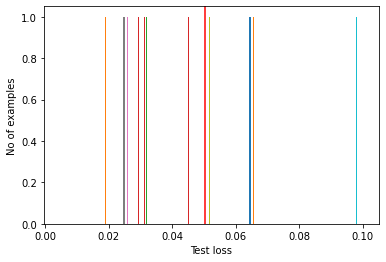

In [113]:
plt.hist(test_loss, bins=30)
plt.xlabel('Test loss')
plt.ylabel('No of examples')
plt.axvline(x=threshold, ymin=0.0, ymax=80, c='red')

plt.show()


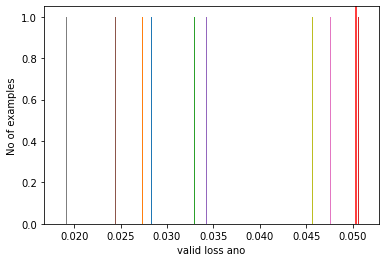

In [115]:
reconstructions_ano = autoencoder.predict(valid_ab_data)
# 비정상 데이터
valid_loss_ano = tf.keras.losses.mae(reconstructions_ano, valid_ab_data)
# 비정상 데이터와 그 복원 데이터의 mae

plt.hist(valid_loss_ano, bins=30)
plt.xlabel('valid loss ano')
plt.ylabel('No of examples')
plt.axvline(x=threshold, ymin=0.0, ymax=80, c='red')

plt.show()

* test

In [116]:
test_data

<tf.Tensor: shape=(87, 60), dtype=float32, numpy=
array([[0.468833  , 0.48215628, 0.52322465, ..., 0.30344486, 0.31227955,
        0.32074428],
       [0.46930784, 0.48595923, 0.53741056, ..., 0.33880383, 0.34512094,
        0.34591693],
       [0.4696532 , 0.48864454, 0.5469515 , ..., 0.39199433, 0.37844276,
        0.3595893 ],
       ...,
       [0.46894088, 0.48310202, 0.52708054, ..., 0.35111558, 0.36284658,
        0.37812343],
       [0.46859556, 0.48035192, 0.5169376 , ..., 0.53693616, 0.53417534,
        0.52477276],
       [0.4689625 , 0.4832307 , 0.52739626, ..., 0.2943012 , 0.29929063,
        0.3062662 ]], dtype=float32)>

In [117]:
test_labels

array([True, True, True, True, True, True, True, True, True, True, True,
       True, False, True, True, False, False, True, True, True, True,
       True, True, False, True, True, True, True, True, True, True, True,
       True, True, True, True, True, True, True, True, True, True, True,
       True, False, False, True, True, True, True, False, True, True,
       True, True, True, False, False, True, True, True, False, True,
       True, True, True, True, True, True, True, True, True, True, True,
       True, True, True, True, True, True, True, True, True, True, True,
       True, True], dtype=object)

In [118]:
def predict(model, data, threshold):
    # model, data, threshold input
    reconstructions = model(data)
    loss = tf.keras.losses.mae(reconstructions, data)
    # mae
    return tf.math.less(loss, threshold)
    #  loss < threshold : Normal

In [131]:
def print_stats(preds, labels):
    print('Accuracy = {}'.format(accuracy_score(labels, preds)))
    print('Precision = {}'.format(precision_score(labels, preds)))
    print('Recall = {}'.format(recall_score(labels, preds)))
    print('F1 score = {}'.format(f1_score(labels, preds)))
    print('Confusion Matrix = {}'.format(confusion_matrix(labels, preds)))

In [132]:
reconstructions = autoencoder(test_data)
loss = tf.keras.losses.mae(reconstructions, test_data)

In [133]:
preds = predict(autoencoder, test_data, threshold)

In [134]:
preds = preds.numpy()

In [135]:
def bi2num(x):
    if x == True:
        return 1
    else:
        return 0

In [136]:
preds_ans = []
for i in preds:
    preds_ans.append(bi2num(i))

In [137]:
test_concat_label_ans = []
for i in test_labels:
    test_concat_label_ans.append(bi2num(i))

In [146]:
cf_matrix = confusion_matrix(test_concat_label_ans, preds_ans)

In [148]:
group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]

<AxesSubplot:>

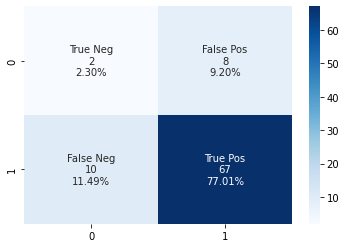

In [149]:
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues')

In [150]:
y_actu = pd.Series(test_concat_label_ans, name='Actual')
y_pred = pd.Series(preds_ans, name='Predicted')
df_confusion_margin = pd.crosstab(y_actu, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
df_confusion = pd.crosstab(y_actu, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=False)

In [151]:
df_confusion_margin

Predicted,0,1,All
Actual,,,
0,2,8,10
1,10,67,77
All,12,75,87


In [156]:
print_stats(preds_ans, test_concat_label_ans)

Accuracy = 0.7931034482758621
Precision = 0.8933333333333333
Recall = 0.8701298701298701
F1 score = 0.881578947368421
Confusion Matrix = [[ 2  8]
 [10 67]]


In [157]:
from sklearn.metrics import roc_auc_score
roc_auc_score(test_concat_label_ans, preds_ans)

0.535064935064935

: 